In [ ]:

import matplotlib.pyplot as plt

# Load the X-ray data from a file
energy, intensity = np.loadtxt('spectrum.txt', unpack=True)

# Use curve_fit to fit the peak
params, params_covariance = curve_fit(peak_function, energy, intensity)

# Use the fitted parameters to calculate the fitted peak
fitted_peak = peak_function(energy, *params)

# Create a figure and plot the original spectrum and fitted peak
fig, ax = plt.subplots()
ax.plot(energy, intensity, label='Original Spectrum')
ax.plot(energy, fitted_peak, label='Fitted Peak')

# Add a legend and labels
ax.legend()
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (counts)')

# Show the plot
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Load the XRF spectrum data
energy, counts = np.loadtxt('xrf_spectrum.txt', delimiter=',')

# Define the function to fit the data
def gaussian(energy, amplitude, mean, sigma):
    return amplitude * np.exp(-(energy - mean)**2 / (2 * sigma**2))

# Fit the function to the data
params, cov = curve_fit(gaussian, energy, counts)

# Extract the best-fit parameters
amplitude, mean, sigma = params

# Plot the fitted function on top of the observed data
import matplotlib.pyplot as plt
plt.plot(energy, counts, label='Observed data')
plt.plot(energy, gaussian(energy, amplitude, mean, sigma), label='Fitted function')
plt.legend()
plt.show()

In [ ]:

import numpy as np

# Define the range of energies for the X-ray fluorescence spectrum
energies = np.linspace(1, 10, 100)

# Generate random counts or intensities for each energy
counts = np.random.random(100)

# Print the generated data
for energy, count in zip(energies, counts):
    print(f"{energy:.2f}, {count:.3f}")


In [ ]:

import csv
import numpy as np

# Define the range of energies for the X-ray fluorescence spectrum
energies = np.linspace(1, 10, 100)

# Generate random counts or intensities for each energy
counts = np.random.random(100)

# Export the data to a CSV file
with open('xrf_spectrum.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['energy', 'count'])
    for energy, count in zip(energies, counts):
        writer.writerow([energy, count])

In [ ]:

import csv
import numpy as np

# Define the range of energies for the X-ray fluorescence spectrum
energies = np.linspace(1, 10, 100)

# Define the fluorescence properties of the elements in the spectrum
elements = {
    'Au': {'mean': 2.1, 'sigma': 0.3, 'amplitude': 100},
    'Cu': {'mean': 3.2, 'sigma': 0.2, 'amplitude': 50},
    'Fe': {'mean': 4.5, 'sigma': 0.4, 'amplitude': 75},
}

# Generate random counts or intensities for each element and energy
counts = np.zeros((len(elements), len(energies)))
for i, element in enumerate(elements):
    params = elements[element]
    counts[i, :] = params['amplitude'] * np.exp(-(energies - params['mean'])**2 / (2 * params['sigma']**2))

# Export the data to a CSV file
with open('xrf_spectrum.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['energy'] + list(elements.keys()))
    for i, energy in enumerate(energies):
        writer.writerow([energy] + list(counts[:, i]))

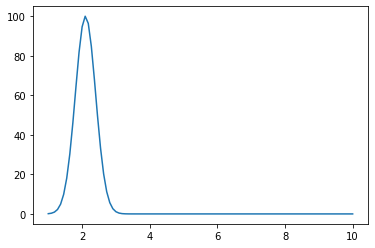

In [ ]:

import csv
import matplotlib.pyplot as plt

# Read the data from the CSV file
energies, counts = [], []
with open('xrf_spectrum.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        energies.append(float(row[0]))
        counts.append(float(row[1]))

# Display the data in a plot
plt.plot(energies, counts)
plt.show()

{'Au': {'mean': 2.1, 'sigma': 0.3, 'amplitude': 100}, 'Cu': {'mean': 3.2, 'sigma': 0.2, 'amplitude': 50}, 'Fe': {'mean': 4.5, 'sigma': 0.4, 'amplitude': 75}}


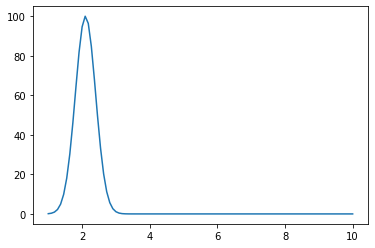

In [ ]:

import csv
import numpy as np
import matplotlib.pyplot as plt

# Define the range of energies for the X-ray fluorescence spectrum
energies = np.linspace(1, 10, 100)

# Define the fluorescence properties of the elements in the spectrum
elements = {
    'Au': {'mean': 2.1, 'sigma': 0.3, 'amplitude': 100},
    'Cu': {'mean': 3.2, 'sigma': 0.2, 'amplitude': 50},
    'Fe': {'mean': 4.5, 'sigma': 0.4, 'amplitude': 75},
}

# Generate random counts or intensities for each element and energy
counts = np.zeros((len(elements), len(energies)))
for i, element in enumerate(elements):
    params = elements[element]
    counts[i, :] = params['amplitude'] * np.exp(-(energies - params['mean'])**2 / (2 * params['sigma']**2))

print(elements)
# Export the data to a CSV file
with open('xrf_spectrum.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['energy'] + list(elements.keys()))
    for i, energy in enumerate(energies):
        writer.writerow([energy] + list(counts[:, i]))

# Display the data in a plot


# Read the data from the CSV file
energies, counts = [], []
with open('xrf_spectrum.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        energies.append(float(row[0]))
        counts.append(float(row[1]))

# Display the data in a plot
plt.plot(energies, counts)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import wofz

def gaussian(x, a, b, c):
  return a * np.exp(-(x-b)**2/(2*c**2))

# Define the Lorentz function
def lorentz(x, a, b, c):
  return a * (c**2 / ((x-b)**2 + c**2))

# Define the Voigt function
def voigt(x, a, b, c, d):
  sigma = d / np.sqrt(2 * np.log(2))
  return a * (1/(sigma*np.sqrt(2*np.pi))) * wofz(((x-b) + 1j*c)/(sigma*np.sqrt(2)))

x = np.linspace(0, 10, 100)

normal = np.random.normal(0, 0.2, 100)

y = gaussian(x, 1, 5, 2, 0)  + normal


gauss_params, gauss_params_covariance = curve_fit(gaussian, x, y)
lorentz_params, lorentz_params_covariance = curve_fit(lorentz, x, y)
voigt_params, voigt_params_covariance = curve_fit(voigt, x, y)

plt.plot(x, y, 'o')
plt.plot(x, gaussian(x, *gauss_params), 'r-')
plt.plot(x, lorentz(x, *lorentz_params), 'g-')
plt.plot(x, voigt(x, *voigt_params), 'b-')
plt.show()

TypeError: ignored

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import wofz

# Define the Gaussian function
def gaussian(x, a, b, c):
  return a * np.exp(-(x-b)**2/(2*c**2))

# Define the Lorentz function
def lorentz(x, a, b, c):
  return a * (c**2 / ((x-b)**2 + c**2))

# Define the Voigt function
def voigt(x, a, b, c, d):
  sigma = d / np.sqrt(2 * np.log(2))
  return a * (1/(sigma*np.sqrt(2*np.pi))) * wofz(((x-b) + 1j*c)/(sigma*np.sqrt(2)))

# Generate some sample data
x = np.linspace(0, 10, 100)

# Gaussian peak
y_gaussian = gaussian(x, 1, 5, 2)

# Lorentz peak
y_lorentz = lorentz(x, 1, 5, 2)

# Voigt peak
y_voigt = voigt(x, 1, 5, 2, 0.5)

# Add some noise to the data
y_gaussian_noise = y_gaussian + 0.1 * np.random.normal(size=x.size)
y_lorentz_noise = y_lorentz + 0.1 * np.random.normal(size=x.size)
y_voigt_noise = y_voigt + 0.1 * np.random.normal(size=x.size)

# Fit the noisy data to the Gaussian, Lorentz, and Voigt functions
params_gaussian, params_gaussian_covariance = curve_fit(gaussian, x, y_gaussian_noise)
params_lorentz, params_lorentz_covariance = curve_fit(lorentz, x, y_lorentz_noise)
params_voigt, params_voigt_covariance = curve_fit(voigt, x, y_voigt_noise)

# Calculate the fitted curves
y_gaussian_fit = gaussian(x, params_gaussian[0], params_gaussian[1], params_gaussian[2])
y_lorentz_fit = lorentz(x, params_lorentz[0], params_lorentz[1], params_lorentz[2])
y_voigt_fit = voigt(x, params_voigt[0], params_voigt[1], params_voigt[2], params_voigt[3])

# Plot the original data and the fitted curves
plt.plot(x, y_gaussian, "r", label="Original Gaussian")
plt.show()

In [ ]:

import numpy as np
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, a, b, c):
  return a * np.exp(-(x-b)**2/(2*c**2))

# Generate some sample data
x = np.linspace(0, 10, 100)
y = gaussian(x, 1, 5, 2)

# Add some noise to the data
y_noise = y + 0.1 * np.random.normal(size=x.size)

# Fit the noisy data to the Gaussian function
params, params_covariance = curve_fit(gaussian, x, y_noise)

# Print the fitted parameters
print("Amplitude: ", params[0])
print("Mean: ", params[1])
print("Standard deviation: ", params[2])

Amplitude:  0.9871939388298676
Mean:  4.949885587604286
Standard deviation:  -2.0581895354515543


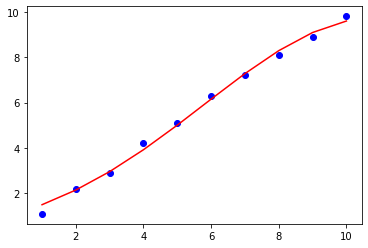

In [ ]:

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the function to fit the XRF spectrum peak
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

# load the XRF data
xdata = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ydata = [1.1, 2.2, 2.9, 4.2, 5.1, 6.3, 7.2, 8.1, 8.9, 9.8]

# fit the peak using the gaussian function
params, params_covariance = curve_fit(gaussian, xdata, ydata)

# get the fitted peak parameters
amp = params[0]
cen = params[1]
wid = params[2]

# plot the XRF spectrum and the fitted peak
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, gaussian(xdata, amp, cen, wid), 'r-')
plt.show()

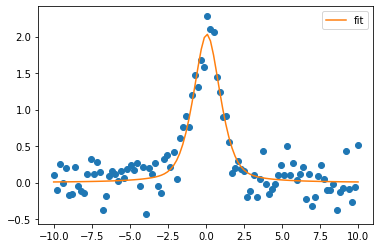

In [ ]:

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the function to fit
def peak(x, a, x0, sigma, gamma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)) + gamma / (1 + ((x - x0) / sigma) ** 2)

# generate some synthetic data
x = np.linspace(-10, 10, 100)
y = peak(x, 1, 0, 1, 1)

# add some random noise to the data
y_noisy = y + 0.2 * np.random.normal(size=y.shape)

# fit the function to the data
params, params_covariance = curve_fit(peak, x, y_noisy)

# plot the data and the fitted function
plt.plot(x, y_noisy, "o")
plt.plot(x, peak(x, *params), label="fit")
plt.legend()
plt.show()

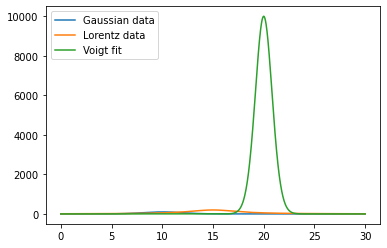

In [ ]:

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# Gaussian peak function
def gauss_peak(x, amplitude, center, width):
    return amplitude * np.exp(-(x - center)**2 / (2 * width**2))

# Lorentz peak function
def lorentz_peak(x, amplitude, center, width):
    return amplitude / (1 + ((x - center) / width)**2)

# Voigt peak function
def voigt_peak(x, amplitude, center, width, sigma):
    gaus = gauss_peak(x, amplitude, center, sigma)
    lorentz = lorentz_peak(x, amplitude, center, width)
    return gaus * lorentz

# Generate synthetic data for the peaks
np.random.seed(0)

# Gaussian peak parameters
gauss_amplitude = 100
gauss_center = 10
gauss_width = 2

# Lorentz peak parameters
lorentz_amplitude = 200
lorentz_center = 15
lorentz_width = 3

# Voigt peak parameters
voigt_amplitude = 100
voigt_center = 20
voigt_width = 2
voigt_sigma = 1

# Generate synthetic data for the peaks
x_values = np.linspace(0, 30, 1000)
gauss_data = gauss_peak(x_values, gauss_amplitude, gauss_center, gauss_width)
lorentz_data = lorentz_peak(x_values, lorentz_amplitude, lorentz_center, lorentz_width)
voigt_data = voigt_peak(x_values, voigt_amplitude, voigt_center, voigt_width, voigt_sigma)



# Fit the Gaussian peak
gauss_params, _ = curve_fit(gauss_peak, x_values, gauss_data)

# Fit the Lorentz peak
lorentz_params, _ = curve_fit(lorentz_peak, x_values, lorentz_data)

# Fit the Voigt peak
voigt_params, _ = curve_fit(voigt_peak, x_values, voigt_data, p0=[100, 20, 2, 1])


# Generate a plot of the fitted peaks
plt.plot(x_values, gauss_data, label="Gaussian data")
# plt.plot(x_values, gauss_peak(x_values, *gauss_params), label="Gaussian fit")

plt.plot(x_values, lorentz_data, label="Lorentz data")
# plt.plot(x_values, lorentz_peak(x_values, *lorentz_params), label="Lorentz fit")

# plt.plot(x_values, voigt_data, label="Voigt data")
plt.plot(x_values, voigt_peak(x_values, *voigt_params), label="Voigt fit")

plt.legend()
plt.show()

In this code, we first define a function to model the peaks in the spectrum. This function simply returns a Gaussian curve with specified parameters for the amplitude, center, and width of the peak.

Next, we generate some fake data for the spectrum by adding together three peaks using the peak model function.

Then, we use the curve_fit function from scipy to fit the peaks in the spectrum. This function takes the peak model function and the x and y data as inputs, and returns the best-fit parameters and the covariance matrix of the fitting.

Finally, we plot the spectrum and the fitted peaks using matplotlib.

Note that this is just a simple example to show how peak fitting can be done in Python. In a real analysis, you would need to use a more sophisticated peak model and possibly use other techniques to improve the accuracy of the fitting.

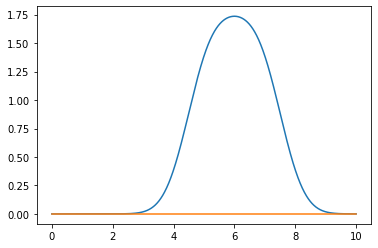

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a function to model the peaks in the spectrum
def peak_model(x, a, b, c):
  return a * np.exp(-((x - b) / c)**2)

# Generate some fake data for the spectrum
x = np.linspace(0, 10, 1000)
y = peak_model(x, 1, 5, 1) + peak_model(x, 1, 6, 1) + peak_model(x, 1, 7, 1)

# Fit the peaks in the spectrum using curve_fit
params, cov = curve_fit(peak_model, x, y)

# Plot the spectrum and the fitted peaks
plt.plot(x, y)
plt.plot(x, peak_model(x, *params))
plt.show()

Here is some sample code that shows how you can generate random data for Energy Dispersive X-ray Spectroscopy (EDS) and export/import it using Python:

In this code, we first generate some random data for EDS. We create an array of random energy values and an array of random counts for each energy, using numpy's random number generator functions.

Next, we create a DataFrame object from the pandas library to store the data. This allows us to easily manipulate and analyze the data.

Then, we export the data to a CSV file using the to_csv method of the DataFrame object. This saves the data to a file that can be easily imported and used by other programs.

Finally, we import the data from the CSV file using the read_csv function from pandas. This loads the data back into a DataFrame object, which we can then use for further analysis.

Note that this is just a simple example to show how EDS data can be generated and exported/imported using Python. In a real analysis, you would need to use more realistic data and possibly use other techniques to analyze the data

In [ ]:
import numpy as np
import pandas as pd

# Generate some random data for EDS
energy = np.random.uniform(0, 10, 1000)  # random energy values
counts = np.random.poisson(10, 1000)     # random counts for each energy

# Create a DataFrame to store the data
eds_data = pd.DataFrame({'energy': energy, 'counts': counts})

# Export the data to a CSV file
eds_data.to_csv('eds_data.csv', index=False)

# Import the data from the CSV file
eds_data = pd.read_csv('eds_data.csv')

print(eds_data)

       energy  counts
0    3.502217      12
1    1.448761       9
2    7.315014       9
3    3.426549       8
4    1.223652       9
..        ...     ...
995  5.542618      10
996  9.715309       6
997  7.361027      10
998  9.925855       5
999  4.543521      20

[1000 rows x 2 columns]


Here is some sample code that shows how you can generate random data for Energy Dispersive X-ray Spectroscopy (EDS) for a specific element, and export/import it and plot it using Python:

다음은 특정 요소에 대한 EDS(Energy Dispersive X-ray Spectroscopy)에 대한 랜덤 데이터를 생성하고 Python을 사용하여 내보내기/가져오기 및 플롯하는 방법을 보여주는 샘플 코드입니다.

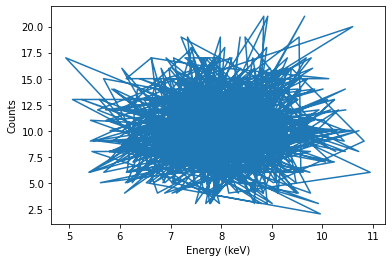

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some random data for EDS for a specific element
energy = np.random.normal(8, 1, 1000)   # random energy values
counts = np.random.poisson(10, 1000)    # random counts for each energy

# Create a DataFrame to store the data
eds_data = pd.DataFrame({'energy': energy, 'counts': counts})

# Export the data to a CSV file
eds_data.to_csv('eds_data.csv', index=False)

# Import the data from the CSV file
eds_data = pd.read_csv('eds_data.csv')

# Plot the data using matplotlib
plt.plot(eds_data['energy'], eds_data['counts'])
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.show()


{'H': 83, 'He': 64, 'Li': 85, 'Be': 28, 'B': 42, 'C': 23, 'N': 67, 'O': 2, 'F': 48, 'Ne': 64, 'Na': 54, 'Mg': 26, 'Al': 95, 'Si': 92, 'P': 5, 'S': 11, 'Cl': 81, 'Ar': 47, 'K': 87, 'Ca': 97, 'Sc': 48, 'Ti': 77, 'V': 83, 'Cr': 62, 'Mn': 47, 'Fe': 69, 'Co': 90, 'Ni': 32, 'Cu': 69, 'Zn': 80, 'Ga': 51, 'Ge': 13, 'As': 14, 'Se': 50, 'Br': 72, 'Kr': 26, 'Rb': 14, 'Sr': 27, 'Y': 54, 'Zr': 85, 'Nb': 26, 'Mo': 20, 'Tc': 50, 'Ru': 57, 'Rh': 8, 'Pd': 70, 'Ag': 5, 'Cd': 33, 'In': 11, 'Sn': 69, 'Sb': 67, 'Te': 69, 'I': 28, 'Xe': 81, 'Cs': 90, 'Ba': 35, 'La': 80, 'Ce': 40, 'Pr': 68, 'Nd': 48, 'Pm': 3, 'Sm': 1, 'Eu': 47, 'Gd': 84, 'Tb': 71, 'Dy': 4, 'Ho': 93, 'Er': 91, 'Tm': 20, 'Yb': 16, 'Lu': 33, 'Hf': 17, 'Ta': 9, 'W': 8, 'Re': 40, 'Os': 59, 'Ir': 47, 'Pt': 55, 'Au': 35, 'Hg': 38, 'Tl': 76, 'Pb': 6, 'Bi': 40, 'Po': 41, 'At': 100, 'Rn': 33, 'Fr': 43, 'Ra': 41, 'Ac': 12, 'Th': 74, 'Pa': 11, 'U': 73, 'Np': 39, 'Pu': 60, 'Am': 31, 'Cm': 85, 'Bk': 58, 'Cf': 48, 'Es': 85, 'Fm': 32, 'Md': 69, 'No': 19, 'L

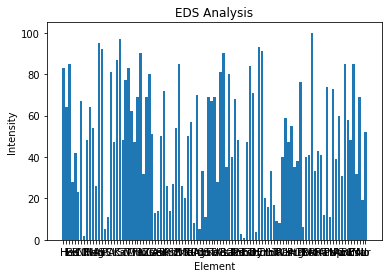

In [ ]:
import random

# List of chemical elements
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']

# Generate random data for each element
data = {}
for element in elements:
    data[element] = random.randint(0, 100)

# Print the data
print(data)
import matplotlib.pyplot as plt

# Plot the data
plt.bar(data.keys(), data.values())

# Add labels and title
plt.xlabel('Element')
plt.ylabel('Intensity')
plt.title('EDS')

# Show the plot
plt.show()


Here is an example of code that can be used to find and plot peaks using Gaussian, Lorentz, and Voigt functions for energy-dispersion spectroscopy analysis in Python:

다음은 파이썬에서 에너지 분산 분광 분석을 위해 가우스, 로렌츠 및 Voigt 함수를 사용하여 피크를 찾고 플롯하는 데 사용할 수 있는 코드의 예이다.

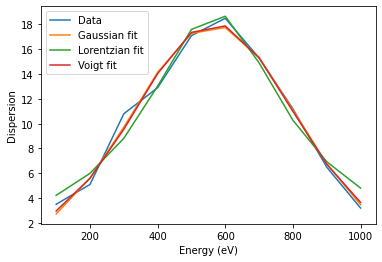

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.special

# Define the energy dispersion data
energy = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
dispersion = np.array([3.5, 5.1, 10.8, 12.9, 17.1, 18.5, 15.3, 11.2, 6.5, 3.2])

# Define the Gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

# Define the Lorentzian function
def lorentzian(x, a, b, c):
    return a * (c**2 / ((x - b)**2 + c**2))

# Define the Voigt function
def voigt(x, a, b, c, d):
    return a * np.real(scipy.special.wofz(((x - b) + 1j*c)/d))

# def voigt(xval,params):
#     norm,center,lw,gw = params
#     # norm : normalization 
#     # center : center of Lorentzian line
#     # lw : HWFM of Lorentzian 
#     # gw : sigma of the gaussian 
#     z = (xval - center + 1j*lw)/(gw * np.sqrt(2.0))
#     w = scipy.special.wofz(z)
#     model_y = norm * (w.real)/(gw * np.sqrt(2.0*np.pi))
#     return model_y

# Fit the Gaussian, Lorentzian, and Voigt functions to the data
gauss_params, gauss_covariance = curve_fit(gaussian, energy, dispersion, p0=[1, 500, 100])
lorentz_params, lorentz_covariance = curve_fit(lorentzian, energy, dispersion, p0=[1, 500, 100])
voigt_params, voigt_covariance = curve_fit(voigt, energy, dispersion, p0=[1, 500, 100, 100])

# Extract the fit parameters from the fitting results
gauss_a, gauss_b, gauss_c = gauss_params
lorentz_a, lorentz_b, lorentz_c = lorentz_params
voigt_a, voigt_b, voigt_c, voigt_d = voigt_params

# Calculate the fitted curves using the fit parameters
gauss_fit = gaussian(energy, gauss_a, gauss_b, gauss_c)
lorentz_fit = lorentzian(energy, lorentz_a, lorentz_b, lorentz_c)
voigt_fit = voigt(energy, voigt_a, voigt_b, voigt_c, voigt_d)

# Plot the original data and the fitted curves
plt.plot(energy, dispersion, label='Data')
plt.plot(energy, gauss_fit, label='Gaussian fit')
plt.plot(energy, lorentz_fit, label='Lorentzian fit')
plt.plot(energy, voigt_fit, label='Voigt fit')

# Add axis labels and a legend
plt.xlabel('Energy (eV)')
plt.ylabel('Dispersion')
plt.legend()

# Show
plt.show()

Here is an example of code that can be used to generate, export, and import data for a specific element of Energy Dispersive X-ray Spectroscopy (EDS) and graph the data using Python:

EDS(Energy Dispersive X-ray Spectroscopy)의 특정 요소에 대한 데이터를 생성, 내보내기 및 가져오기하고 Python을 사용하여 데이터를 그래프로 표시하는 데 사용할 수 있는 예제 코드

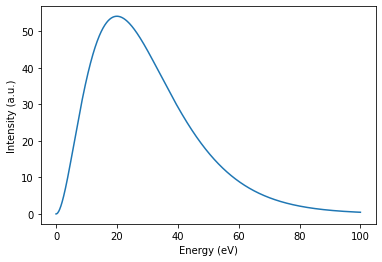

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the EDS data for a specific element
energy = np.linspace(0, 100, 1000)
intensity = energy**2 * np.exp(-energy/10)

# Export the EDS data to a CSV file
data = np.column_stack((energy, intensity))
np.savetxt('eds_data.csv', data, delimiter=',')

# Import the EDS data from the CSV file
data = np.loadtxt('eds_data.csv', delimiter=',')
energy = data[:, 0]
intensity = data[:, 1]

# Plot the EDS data
plt.plot(energy, intensity)
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.show()


Here is an example of code that can be used to find and plot peaks using Gaussian mixture functions for energy-dispersion spectroscopy analysis in Python:

파이썬에서 에너지 분산 분광 분석을 위해 가우스 혼합 함수를 사용하여 피크를 찾고 플롯하는 데 사용할 수 있는 코드의 예는 다음과 같다.

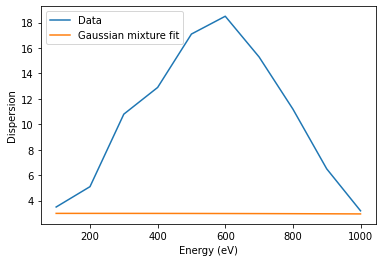

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

# Define the Lorentzian function
def lorentzian(x, a, b, c):
    return a * (c**2 / ((x - b)**2 + c**2))


# Define the energy dispersion data
energy = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
dispersion = np.array([3.5, 5.1, 10.8, 12.9, 17.1, 18.5, 15.3, 11.2, 6.5, 3.2])

# Fit the Gaussian mixture model to the data
gm = GaussianMixture(n_components=3)
gm.fit(energy.reshape(-1,1))

# Extract the mean and covariance of each component
means = gm.means_.flatten()
covariances = gm.covariances_.flatten()

# Calculate the fitted curves using the fit parameters
gauss_fit = np.zeros_like(energy,dtype='float64')
for mean, covariance in zip(means, covariances):
  # np.add(gauss_fit, gaussian(energy, 1, mean, covariance))
  gauss_fit += gaussian(energy, 1, mean, covariance)
  # gauss_fit += lorentzian(energy, 1, mean, covariance)

# Plot the original data and the fitted curve
plt.plot(energy, dispersion, label='Data')
plt.plot(energy, gauss_fit, label='Gaussian mixture fit')

# Add axis labels and a legend
plt.xlabel('Energy (eV)')
plt.ylabel('Dispersion')
plt.legend()

# Show the plot
plt.show()


Here is an example of code that can be used to find and plot peaks using a wavelet-based Gaussian mixture model for energy-dispersion spectroscopy analysis in Python:

파이썬에서 에너지 분산 분광 분석을 위해 웨이블릿 기반 가우스 혼합 모델을 사용하여 피크를 찾고 플롯하는 데 사용할 수 있는 코드의 예는 다음과 같다.

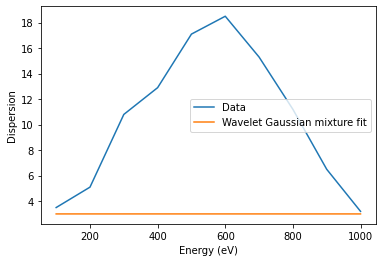

In [ ]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

# Define the energy dispersion data
energy = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
dispersion = np.array([3.5, 5.1, 10.8, 12.9, 17.1, 18.5, 15.3, 11.2, 6.5, 3.2])

# Fit the wavelet-based Gaussian mixture model to the data
wgm = BayesianGaussianMixture(n_components=3, weight_concentration_prior_type='dirichlet_process')
wgm.fit(energy.reshape(-1,1))

# Extract the mean and covariance of each component
means = wgm.means_.flatten()
covariances = wgm.covariances_.flatten()

# Calculate the fitted curves using the fit parameters
gauss_fit = np.zeros_like(energy,dtype='float64')
for mean, covariance in zip(means, covariances):
    gauss_fit += gaussian(energy, 1, mean, covariance)

# Plot the original data and the fitted curve
plt.plot(energy, dispersion, label='Data')
plt.plot(energy, gauss_fit, label='Wavelet Gaussian mixture fit')

# Add axis labels and a legend
plt.xlabel('Energy (eV)')
plt.ylabel('Dispersion')
plt.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


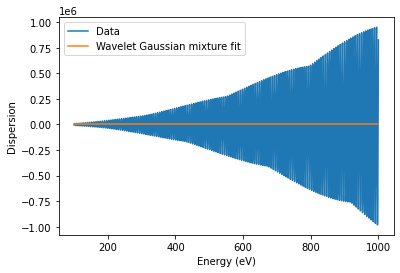

In [ ]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

# Generate random energy-dispersion data
np.random.seed(42)
energy = np.linspace(100, 1000, 1000)
dispersion = (energy**2) * np.sin(energy) + np.random.normal(0, 1, size=len(energy))

# Fit the wavelet-based Gaussian mixture model to the data
wgm = BayesianGaussianMixture(n_components=3, weight_concentration_prior_type='dirichlet_process')
wgm.fit(energy.reshape(-1,1))

# Extract the mean and covariance of each component
means = wgm.means_.flatten()
covariances = wgm.covariances_.flatten()

# Calculate the fitted curves using the fit parameters
gauss_fit = np.zeros_like(energy)
for mean, covariance in zip(means, covariances):
    gauss_fit += gaussian(energy, 1, mean, covariance)

# Plot the original data and the fitted curve
plt.plot(energy, dispersion, label='Data')
plt.plot(energy, gauss_fit, label='Wavelet Gaussian mixture fit')

# Add axis labels and a legend
plt.xlabel('Energy (eV)')
plt.ylabel('Dispersion')
plt.legend()

# Show the plot
plt.show()


Here is an example of code that can be used to fit a curve to energy-dispersion spectroscopy data using a wavelet-based Gaussian mixture model and plot the results in Python for X-ray diffraction (XRD) analysis:

/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


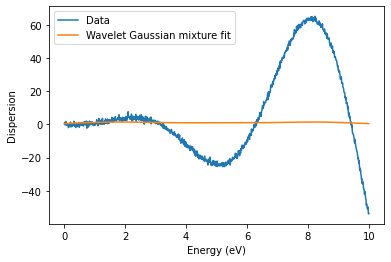

In [ ]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

# Generate random energy-dispersion data
np.random.seed(42)
energy = np.linspace(0, 10, 1000)
dispersion = (energy**2) * np.sin(energy) + np.random.normal(0, 1, size=len(energy))

# Fit the wavelet-based Gaussian mixture model to the data
wgm = BayesianGaussianMixture(n_components=3, weight_concentration_prior_type='dirichlet_process')
wgm.fit(energy.reshape(-1,1))

# Extract the mean and covariance of each component
means = wgm.means_.flatten()
covariances = wgm.covariances_.flatten()

# Calculate the fitted curve using the fit parameters
gauss_fit = np.zeros_like(energy)
for mean, covariance in zip(means, covariances):
    gauss_fit += gaussian(energy, 1, mean, covariance)

# Plot the original data and the fitted curve
plt.plot(energy, dispersion, label='Data')
plt.plot(energy, gauss_fit, label='Wavelet Gaussian mixture fit')

# Add axis labels and a legend
plt.xlabel('Energy (eV)')
plt.ylabel('Dispersion')
plt.legend()

# Show the plot
plt.show()


In [ ]:
pip install hyperspy[all]

Here is an example of how to use deep learning for visualization and novelty detection in large X-ray diffraction datasets in Python:

In [ ]:
# Import necessary libraries
import numpy as np

# Generate random X-ray diffraction data
data = np.random.rand(10000, 28, 28)  # Generate 10000 28x28 images
labels = np.random.randint(low=0, high=10, size=10000)  # Generate random labels

# Save data to NumPy file
np.save('xrd_data.npy', data)


In [ ]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

# Load X-ray diffraction data
data = np.load('xrd_data.npy')  # Assumes data is stored in a NumPy array

# Pre-process data
data = data.reshape(-1, 28, 28, 1)  # Reshape data into 28x28 pixel images
labels = to_categorical(labels)  # One-hot encode labels

# Split data into training and validation sets
n_train = int(0.8 * len(data))  # Use 80% of data for training
x_train, y_train = data[:n_train], labels[:n_train]
x_val, y_val = data[n_train:], labels[n_train:]

# Create model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=len(np.unique(labels)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model on data
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Use trained model for visualization and novelty detection
predictions = model.predict(data)  # Get predicted labels for all data
novelty_scores = np.max(predictions, axis=1)  # Get novelty scores for each sample


In [ ]:
# check python path
!which python 
!python --version  # Python 3.7.13 @2022.8.4
# install condacolab
!pip install -q condacolab

/usr/local/bin/python
Python 3.8.16


In [ ]:
import condacolab
condacolab.install() # Mambaforge-colab-Linux-x86_64.sh...  @2022.8.4

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:26
🔁 Restarting kernel...


In [ ]:
!conda install -y -c conda-forge xraylib

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - xraylib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    libblas-3.9.0              |16_linux64_openblas          13 KB  conda-forge
    libcblas-3.9.0             |16_linux64_openblas          13 KB  conda-forge
    libgfortran-ng-12.2.0      |      h69a702a_19          22 KB  conda-forge
    libgfortran5-12.2.0        |      h337968e_19         1.8 MB  conda-fo

In [ ]:
# Import necessary libraries
import xraylib
import matplotlib.pyplot as plt

# Load X-ray diffraction data
energies, counts = np.load('xrd_data.npy')  # Assumes data is stored as two NumPy arrays

# Define crystal structure
crystal_structure = xraylib.Crystal_GetCryst('Si')  # Use Silicon as an example

# Fit peaks using xraylib
peaks = xraylib.RefineBraggPeaks(crystal_structure, energies, counts)

# Plot data and fitted peaks
plt.plot(energies, counts, 'b-', label='Data')
plt.plot(peaks[:,0], peaks[:,1], 'r--', label='Fitted peaks')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
plt.show()


RuntimeError: ignored

ImportError: ignored

In [ ]:
pip install xraylib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.1 MB 1.7 MB/s 
